<a href="https://colab.research.google.com/github/teazaw/MAT421-Applied-Computational-Methods/blob/main/MAT421_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.2 Continuity and Differentiation**

A function *f(x)* is **continuous** at a point *x=c* if the following three conditions are met:
1. *f(c)* is defined.
2. lim *f(x)* exists.
3. lim *f(x)* = *f(c)*.

If a function is continuous at every point in an interval, it is called a continuous function on that interval. Therefore, a function is continuous if there are no breaks, holes, or jumps in its graph.

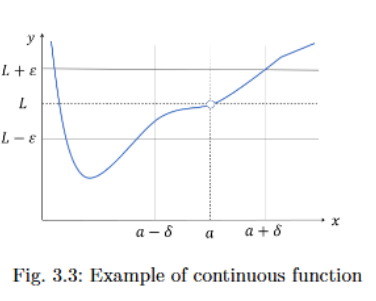



A **discontinuity** is a point at which a function is discontinuous or undefined. There are several types of discontinuities:
1. **Removable discontinuity:** a hole in the graph where the function is not defined but could be "fixed" by redefining it.
2. **Jump discontinuity:** a sudden jump in function values.
3. **Infinite discontinuity:** a vertical asymptote where the function tends toward infinity.

**Differentiation** is the process of finding the derivative of a function, which measures how the function changes as its input changes.

The derivative of a function *f(x)* at a point *x=c* is given by:


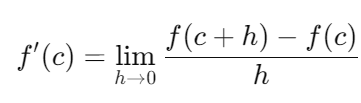

A differentiable function is always continuous, but a continuous function is not necessarily differentiable. Furthermore, if a function is not continuous at a point, it cannot be differentiable at that point.

The following coding example visually demonstrates continuity and differentiability.

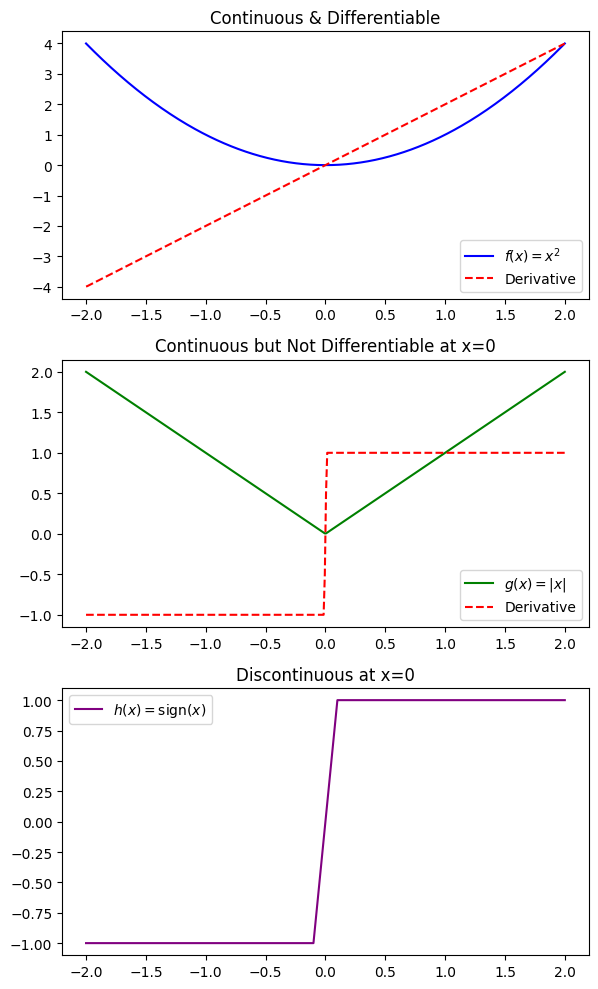

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)
x_discont = np.linspace(-2, -0.1, 200).tolist() + np.linspace(0.1, 2, 200).tolist()

# define functions
f = x**2
g = np.abs(x)
h = np.piecewise(x, [x < 0, x >= 0], [lambda x: -1, lambda x: 1])

# compute derivatives
df_dx = np.gradient(f, x)
dg_dx = np.gradient(g, x)


fig, axs = plt.subplots(3, 1, figsize=(6, 10))

# plot functions
axs[0].plot(x, f, label=r"$f(x) = x^2$", color='blue')
axs[0].plot(x, df_dx, '--', label="Derivative", color='red')
axs[0].set_title("Continuous & Differentiable")
axs[0].legend()


axs[1].plot(x, g, label=r"$g(x) = |x|$", color='green')
axs[1].plot(x, dg_dx, '--', label="Derivative", color='red')
axs[1].set_title("Continuous but Not Differentiable at x=0")
axs[1].legend()


axs[2].plot(x_discont, np.sign(x_discont), label=r"$h(x) = \text{sign}(x)$", color='purple')
axs[2].set_title("Discontinuous at x=0")
axs[2].legend()


plt.tight_layout()
plt.show()


# **3.2.3 Taylor's Theorem**

**Taylor's theorem** provides an approximation of a function *f(x)* near a point x*=a* using a polynomial. Taylor's theorem states that, if a function *f(x)* is (n+1)-times differentiable at *x=a*, then it can be approximated by a Taylor series expansion:

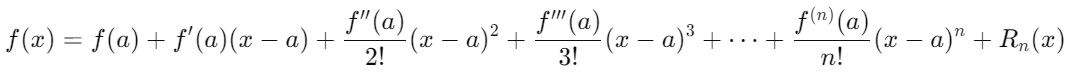

There are some special cases of Taylor's theorem:
1. Maclaurin Series: If a=0, the Taylor series is called a Maclaurin series.
2. First-Order Approximation (Linear Approximation)
3. Second-Order Approximation (Quadratic Approximation)

The following Python example visualizes the Taylor series expansion at *x=0*.

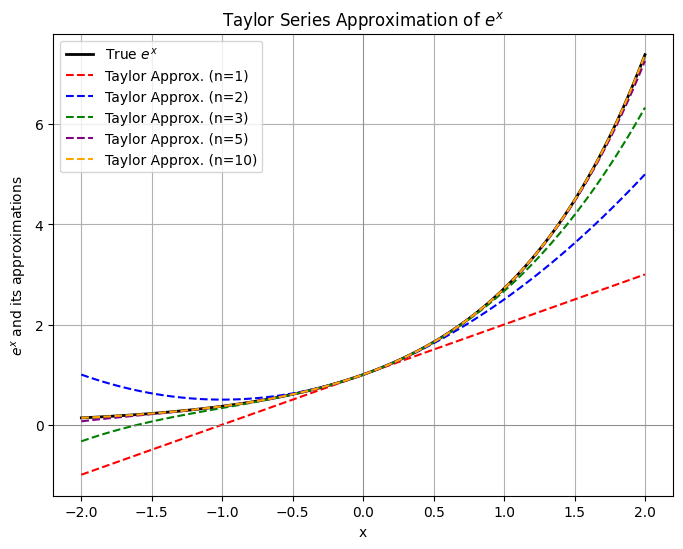

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math


def true_ex(x):
    return np.exp(x)

# taylor series function
def taylor_ex(x, n):
    approximation = np.sum([(x**i) / math.factorial(i) for i in range(n+1)])
    return approximation


x_values = np.linspace(-2, 2, 100)
y_true = true_ex(x_values)  # True function values


plt.figure(figsize=(8, 6))
plt.plot(x_values, y_true, label="True $e^x$", color='black', linewidth=2)

#plot taylor series
colors = ['red', 'blue', 'green', 'purple', 'orange']
terms = [1, 2, 3, 5, 10]  # Different degrees of approximation

for i, n in enumerate(terms):
    y_taylor = [taylor_ex(x, n) for x in x_values]
    plt.plot(x_values, y_taylor, label=f"Taylor Approx. (n={n})", color=colors[i], linestyle="--")


plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel("x")
plt.ylabel("$e^x$ and its approximations")
plt.title("Taylor Series Approximation of $e^x$")
plt.legend()
plt.grid()
plt.show()


# **3.3.3 (Optimization with) Gradient Descent**

**Optimization** is the process of finding the **minimum or maximum** of a function. In machine learning, optimization is used to minimize loss functions and help models learn by adjusting parameters.

**Gradient descent** is an iterative optimization algorithm used find the minimum of a function. We restrict ourselves to minimization problems of the form:  

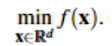



There are several types of gradient descents:
1. **Batch gradient Descent**: Uses all data points to compute the gradient.
2. **Stochastic Gradient Descent**: Uses one random data point at a time.
3. **Mini-Batch Gradient Descent**: Uses a small batch of data points.



The following coding example minimizes the function *f(x)=x^2*.

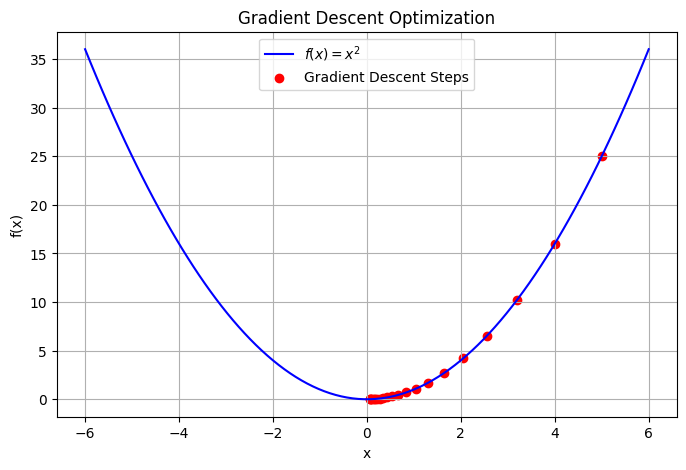

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#function and derivatives
def f(x):
    return x**2

def df(x):
    return 2*x

# descent parameters
learning_rate = 0.1
x = 5
iterations = 20


x_values = [x]
f_values = [f(x)]

# descent loop
for _ in range(iterations):
    x = x - learning_rate * df(x)
    x_values.append(x)
    f_values.append(f(x))

#plot function
x_plot = np.linspace(-6, 6, 100)
y_plot = f(x_plot)

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, label=r"$f(x) = x^2$", color="blue")
plt.scatter(x_values, f_values, color="red", label="Gradient Descent Steps")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Optimization")
plt.legend()
plt.grid()
plt.show()
